# Exercici 1

Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means.

In [1]:
import pandas as pd

In [2]:
df= pd.read_csv ('Publicacions Facebook Thailandia.csv')
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [4]:
df = pd.get_dummies(df, columns=["status_type"])
df.head()

,status_id,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4,status_type_link,status_type_photo,status_type_status,status_type_video
0,246675545449582_1649696485147474,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN,0,0,0,1
1,246675545449582_1649426988507757,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN,0,1,0,0
2,246675545449582_1648730588577397,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN,0,0,0,1
3,246675545449582_1648576705259452,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN,0,1,0,0
4,246675545449582_1645700502213739,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN,0,1,0,0


Faig dummies a status_type

In [5]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4,status_type_link,status_type_photo,status_type_status,status_type_video
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,0.0,0.0,0.0,0.0,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,NaN,NaN,NaN,NaN,0.008936,0.608227,0.051773,0.331064
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,NaN,NaN,NaN,NaN,0.094115,0.488181,0.221584,0.470629
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,1.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000


In [6]:
df[df.duplicated() ]

,status_id,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4,status_type_link,status_type_photo,status_type_status,status_type_video
6221,819700534875473_1002372733274918,6/10/2018 3:43,376,20,3,354,19,3,0,0,0,NaN,NaN,NaN,NaN,0,0,0,1
6222,819700534875473_1001982519980606,6/9/2018 22:53,255,7,4,249,6,0,0,0,0,NaN,NaN,NaN,NaN,0,1,0,0
6223,819700534875473_1000607730118085,6/7/2018 7:01,1704,21,3,1685,15,2,2,0,0,NaN,NaN,NaN,NaN,0,1,0,0
6224,819700534875473_999880033524188,6/6/2018 2:20,205,39,4,197,4,4,0,0,0,NaN,NaN,NaN,NaN,0,0,1,0
6225,819700534875473_998824716963053,6/4/2018 6:57,336,42,2,285,5,0,0,46,0,NaN,NaN,NaN,NaN,0,1,0,0
6226,819700534875473_997075427137982,6/1/2018 0:35,111,2,1,110,1,0,0,0,0,NaN,NaN,NaN,NaN,0,0,1,0
6227,819700534875473_995933077252217,5/30/2018 6:33,357,18,9,352,3,1,1,0,0,NaN,NaN,NaN,NaN,0,1,0,0
6228,819700534875473_995839410594917,5/30/2018 2:39,114,7,0,109,3,2,0,0,0,NaN,NaN,NaN,NaN,0,1,0,0
6229,819700534875473_995218893990302,5/29/2018 4:39,133,7,1,127,6,0,0,0,0,NaN,NaN,NaN,NaN,0,0,1,0
6230,819700534875473_993975437447981,5/27/2018 1:31,532,32,4,480,47,5,0,0,0,NaN,NaN,NaN,NaN,0,1,0,0


In [7]:
df.drop_duplicates()

,status_id,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4,status_type_link,status_type_photo,status_type_status,status_type_video
0,246675545449582_1649696485147474,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN,0,0,0,1
1,246675545449582_1649426988507757,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN,0,1,0,0
2,246675545449582_1648730588577397,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN,0,0,0,1
3,246675545449582_1648576705259452,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN,0,1,0,0
4,246675545449582_1645700502213739,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN,0,1,0,0
7046,1050855161656896_1061334757275603,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN,0,1,0,0
7047,1050855161656896_1060126464063099,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN,0,1,0,0
7048,1050855161656896_1058663487542730,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN,0,1,0,0


In [8]:
df=df.drop (columns=['Column1','Column2','Column3','Column4','status_id'])

Elimino columnes buides i que no aporten info

In [9]:
df['status_published'] = pd.to_datetime(df['status_published']).dt.date

Passo a format data la columna status_published

In [10]:
df = df.set_index('status_published')
df_original= df

Passo status_published a index i creo còpia per treballar posteriorment

<Figure size 432x288 with 0 Axes>

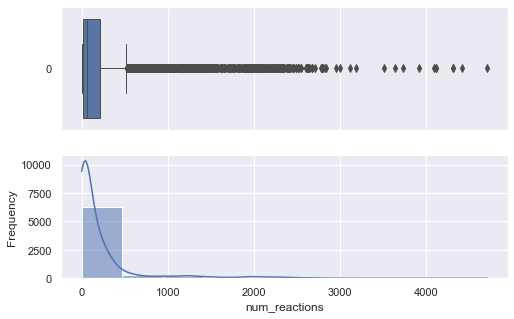

<Figure size 576x360 with 0 Axes>

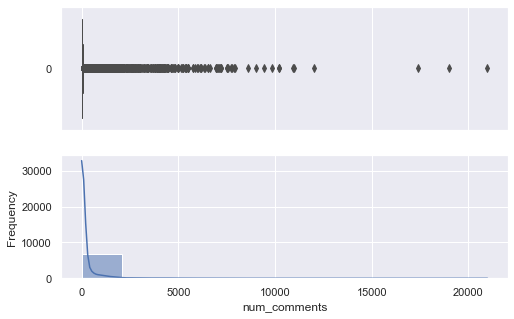

<Figure size 576x360 with 0 Axes>

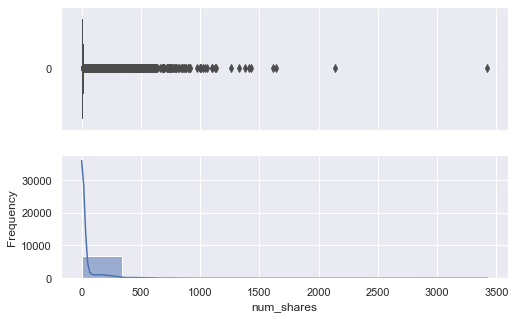

<Figure size 576x360 with 0 Axes>

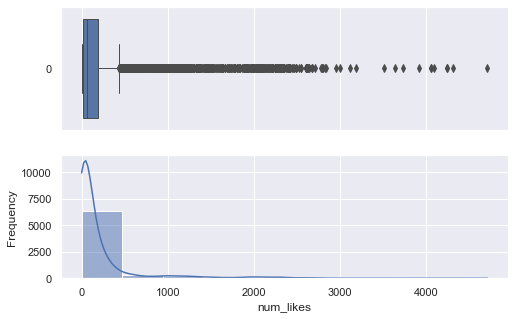

<Figure size 576x360 with 0 Axes>

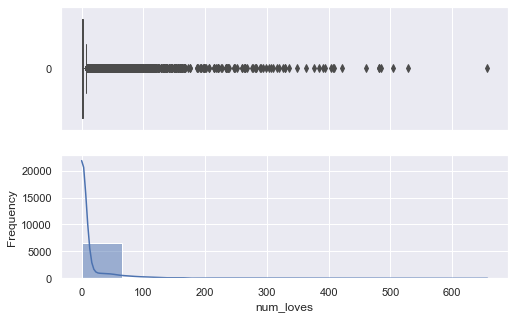

<Figure size 576x360 with 0 Axes>

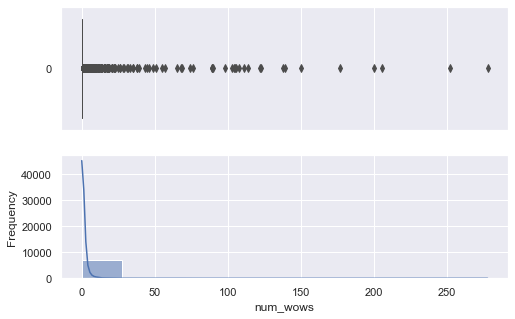

<Figure size 576x360 with 0 Axes>

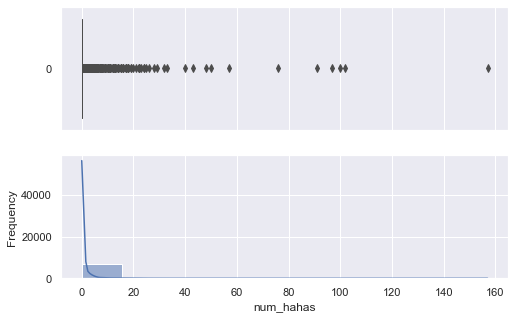

<Figure size 576x360 with 0 Axes>

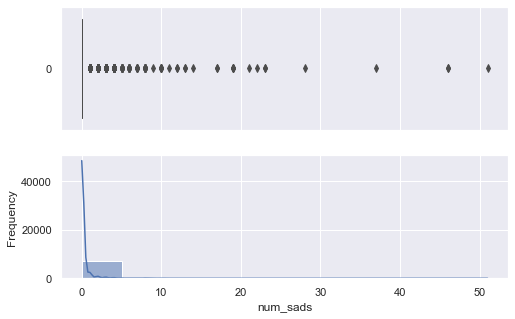

<Figure size 576x360 with 0 Axes>

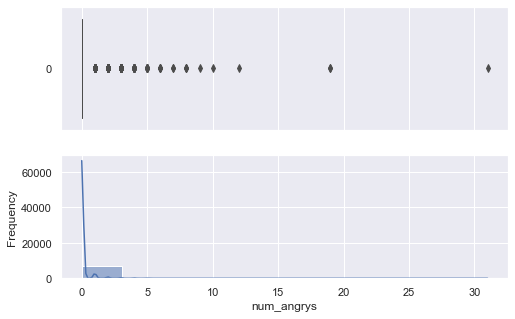

<Figure size 576x360 with 0 Axes>

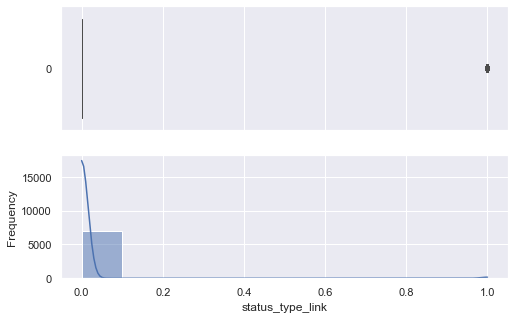

<Figure size 576x360 with 0 Axes>

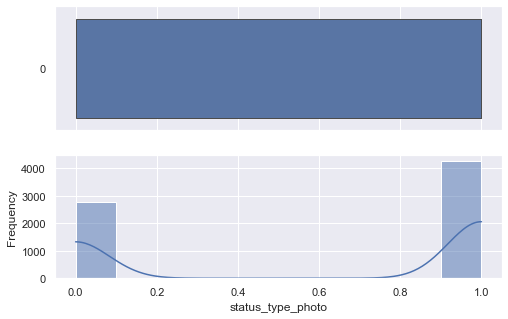

<Figure size 576x360 with 0 Axes>

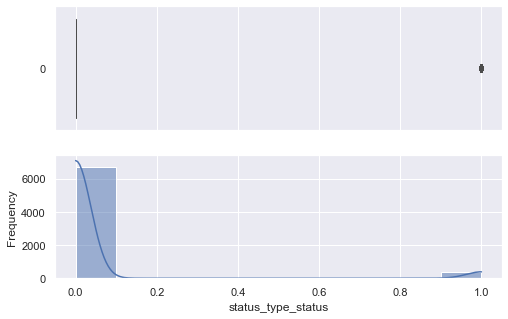

<Figure size 576x360 with 0 Axes>

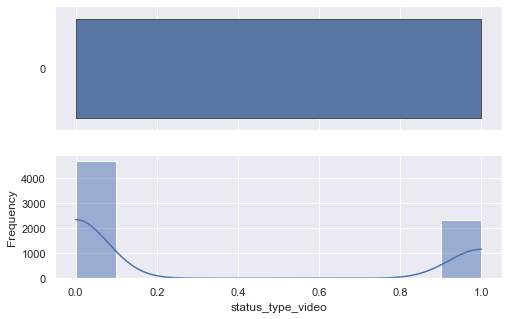

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

for i in df.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i],  ax=ax_box , linewidth= 1.0, orient='h')
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True)

In [12]:
from scipy import stats

print('Hipotesis nula Ho -> La mostra té una distribució normal')
print('Hipotesis alternativa H1 -> La mostra no té una distribució normal\n\n')

for i in df.columns:
    shapiro_test = stats.shapiro(df[i])
    print('Per la variable ', i, "amb un p-value de ", shapiro_test.pvalue)
    if shapiro_test.pvalue>0.05:
        print('No podem rebutjar hipotesis nula\n')
    else:
        print("Podem rebutjar l'hipotesis nula\n")

Hipotesis nula Ho -> La mostra té una distribució normal
Hipotesis alternativa H1 -> La mostra no té una distribució normal


Per la variable  num_reactions amb un p-value de  0.0
Podem rebutjar l'hipotesis nula

Per la variable  num_comments amb un p-value de  0.0
Podem rebutjar l'hipotesis nula

Per la variable  num_shares amb un p-value de  0.0
Podem rebutjar l'hipotesis nula

Per la variable  num_likes amb un p-value de  0.0
Podem rebutjar l'hipotesis nula

Per la variable  num_loves amb un p-value de  0.0
Podem rebutjar l'hipotesis nula

Per la variable  num_wows amb un p-value de  0.0
Podem rebutjar l'hipotesis nula

Per la variable  num_hahas amb un p-value de  0.0
Podem rebutjar l'hipotesis nula

Per la variable  num_sads amb un p-value de  0.0
Podem rebutjar l'hipotesis nula

Per la variable  num_angrys amb un p-value de  0.0
Podem rebutjar l'hipotesis nula

Per la variable  status_type_link amb un p-value de  0.0
Podem rebutjar l'hipotesis nula

Per la variable  status_type_p

Cap de les columnes té una distribució normal i totes tenen outliers, per tant aplicarem robust escaler a totes les columnes,exceptuant les creades per dummies. 

In [13]:
from sklearn import preprocessing 

from sklearn.preprocessing import RobustScaler
columnsRobust = ['num_reactions' ,'num_comments' ,'num_shares' ,'num_likes' ,'num_loves' ,'num_wows' ,'num_hahas' ,'num_sads' ,'num_angrys']
scaler = preprocessing.RobustScaler().fit(df[columnsRobust])
df[columnsRobust] = scaler.transform(df[columnsRobust])

Calcular nombre de dimensions a reduir

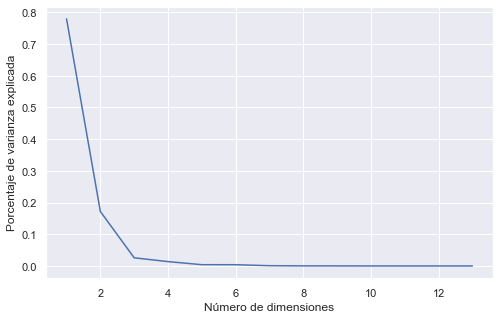

In [14]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Calcular el porcentaje de varianza explicada por cada componente principal
pca = PCA()
pca.fit(df)
explained_variance = pca.explained_variance_ratio_

# Graficar el porcentaje de varianza explicada
plt.plot(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel('Número de dimensiones')
plt.ylabel('Porcentaje de varianza explicada')
plt.show()


Reduim les dimensions i calculem la pèrdua d'informació

In [15]:
# Creamos una instancia de la clase PCA
pca = PCA(n_components=3)

# Aplicamos PCA a nuestro conjunto de datos
df = pca.fit_transform(df)
import numpy as np
from sklearn.decomposition import PCA


# Calcular el porcentaje de varianza explicado total de los datos originales
total_explained_variance = np.sum(pca.explained_variance_ratio_)

# Calcular el porcentaje de varianza explicado acumulado de las dimensiones reducidas
reduced_explained_variance = np.cumsum(pca.explained_variance_ratio_)[-1]

# Imprimir el porcentaje de varianza explicado total y el porcentaje de varianza explicado acumulado de las dimensiones reducidas
print(f"Porcentaje de varianza explicado total: {total_explained_variance}")
print(f"Porcentaje de varianza explicado acumulado de las dimensiones reducidas: {reduced_explained_variance}")

#Calcular la pérdida de información

information_loss = 1 - reduced_explained_variance
print(f"Pérdida de información: {information_loss}")

Porcentaje de varianza explicado total: 0.9772858038384077
Porcentaje de varianza explicado acumulado de las dimensiones reducidas: 0.9772858038384077
Pérdida de información: 0.022714196161592315


Decidim mantenir 3 mètriques, ja que tan sols tenim una pèrdua del 2,3%

Calcular nombre de clusters amb el mètode del codo

In [16]:
df=pd.DataFrame(df)

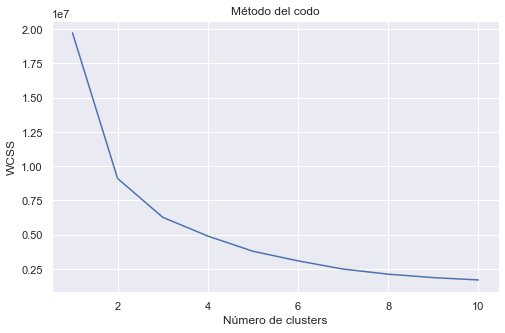

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Convertir DataFrame a matriz numpy
X = df.values

# Crear una lista para almacenar las varianzas
wcss = []

# Utilizar diferentes valores de k
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Graficar el método del codo
plt.plot(range(1, 11), wcss)
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()


Ja que l'angle entre el 2 i el 3 és molt semblant utilitzarem Knee Method per a determinar amb major precisió el nombre de clusters

In [18]:

from sklearn import metrics

# calcular la derivada de la inercia con respecto al número de clusters
derivative = np.diff(wcss)

# encontrar el punto de "rodilla" en la gráfica
knee = np.argmin(derivative) + 2 # ajustar el índice para que se corresponda con el número de clusters

# imprimir el número óptimo de clusters
print("El número óptimo de clusters es:", knee)


El número óptimo de clusters es: 2


Apliquem K-means amb 2 clusters

In [19]:

# Crear objeto KMeans con 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)

# Ajustar modelo con el conjunto de datos
kmeans.fit(X)

# Obtener etiquetas de cada punto
labels = kmeans.labels_

# Obtener coordenadas de los centroides
cluster_centers = kmeans.cluster_centers_


Grafiquem resultats

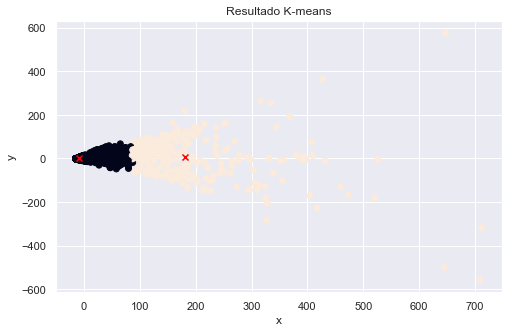

In [20]:
# Crear gráfico de dispersión
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x')
plt.title('Resultado K-means')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Avaluem resultats amb Silhouette

In [21]:
from sklearn import metrics
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
print("Silhouette Score: ", silhouette_score)
silhouette_score_K2=silhouette_score

Silhouette Score:  0.8984738049127969


Obtenim un valor 0.89 en Silhouette i veient el gràfic podem valorar com a bons resultats la classificiació

# Apliquem clustering jeràrquic

Busquem el millor valor de clusters

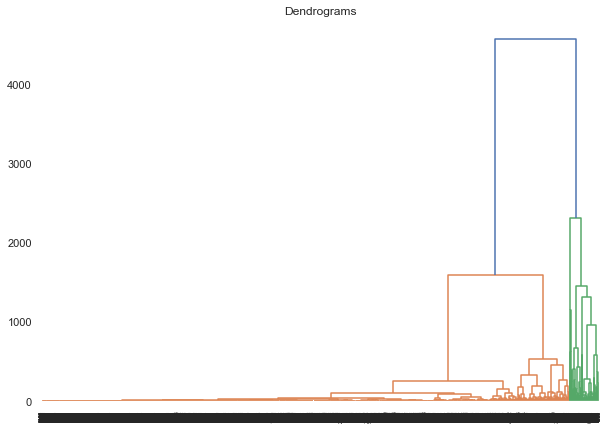

In [22]:
import matplotlib.pyplot as plt

import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df, method='ward'))

El millor valor seran 2 clusters

In [23]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(df)

array([1, 1, 1, ..., 1, 1, 1])

Avaluem resultats amb Silhouette

In [24]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering


# Perform Hierarchical Clustering
agg_cluster = AgglomerativeClustering(n_clusters=2)
agg_cluster.fit(df)

# Calculate Silhouette Score
silhouette_score=silhouette_score(df, agg_cluster.labels_)
silhouette_score_cj2=silhouette_score
print (silhouette_score_cj2)


0.8906054169810647


In [25]:
df_compar= pd.DataFrame()
df_compar ['Mètodes']= 'K-Means','Clustering Jerarquic'
df_compar['Valor']= silhouette_score_K2,silhouette_score_cj2
df_compar=df_compar.set_index('Mètodes')
df_compar

,Valor
Mètodes,
K-Means,0.898474
Clustering Jerarquic,0.890605


Escollim el mètode K-Means, ja que ens aporta una major puntuació

In [26]:
df_original ['cluster'] = labels
df=df_original
df.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video,cluster
status_published,,,,,,,,,,,,,,
2018-04-22,2.324257,22.086957,65.50,2.229508,30.666667,3.0,1.0,1.0,0.0,0,0,0,1,0
2018-04-21,0.448020,-0.173913,0.00,0.548435,0.000000,0.0,0.0,0.0,0.0,0,1,0,0,0
2018-04-21,0.829208,10.086957,14.25,0.870343,7.000000,1.0,1.0,0.0,0.0,0,0,0,1,0
2018-04-21,0.254950,-0.173913,0.00,0.315946,0.000000,0.0,0.0,0.0,0.0,0,1,0,0,0
2018-04-18,0.759901,-0.173913,0.00,0.870343,3.000000,0.0,0.0,0.0,0.0,0,1,0,0,0


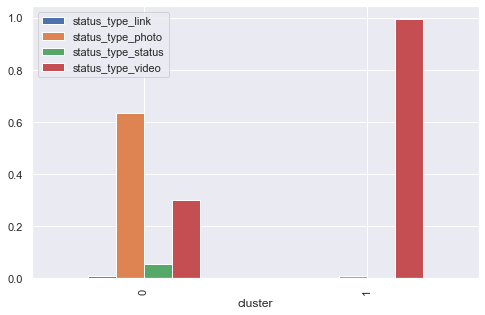

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular el valor promedio de las columnas 'col1' y 'col2' por cada valor de la columna 'cluster'
mean_values = df.groupby(['cluster'])[['status_type_link', 'status_type_photo','status_type_status','status_type_video']].mean()

# Crear una tabla pivotada con las columnas 'col1' y 'col2' según el valor de la columna 'cluster'
pivot_table = mean_values.pivot_table(values=['status_type_link', 'status_type_photo','status_type_status','status_type_video'], index='cluster')

# Graficar los datos en un gráfico de barras
pivot_table.plot(kind='bar')

# Mostrar el gráfico
plt.show()

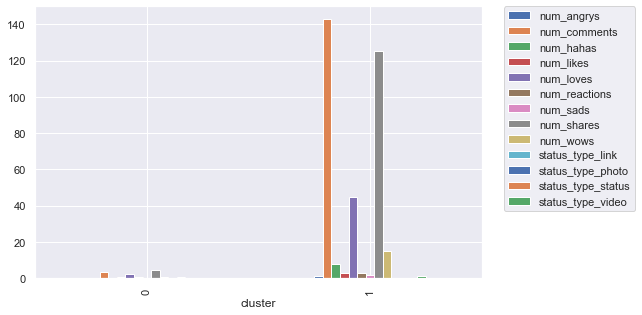

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular el valor promedio de las columnas 'col1' y 'col2' por cada valor de la columna 'cluster'
mean_values = df.groupby(['cluster']).mean()

# Crear una tabla pivotada con las columnas 'col1' y 'col2' según el valor de la columna 'cluster'
pivot_table = mean_values.pivot_table( index='cluster')

# Graficar los datos en un gráfico de barras
pivot_table.plot(kind='bar')

legend = plt.legend()

#Posicionar la leyenda fuera del gráfico
legend.set_bbox_to_anchor((1.05, 1))

#Especificar la posición de la leyenda respecto al eje x
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)




# Mostrar el gráfico
plt.show()

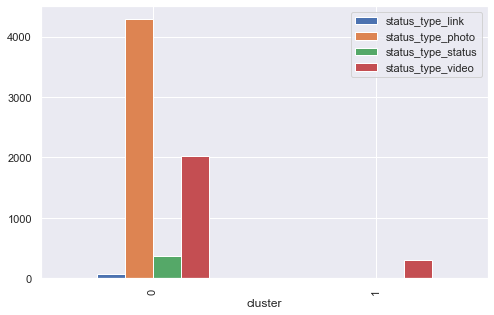

In [29]:
# Calcular el valor promedio de las columnas 'col1' y 'col2' por cada valor de la columna 'cluster'
sum_values = df.groupby(['cluster'])[['status_type_link', 'status_type_photo','status_type_status','status_type_video']].sum()

# Crear una tabla pivotada con las columnas 'col1' y 'col2' según el valor de la columna 'cluster'
pivot_table = sum_values.pivot_table(values=['status_type_link', 'status_type_photo','status_type_status','status_type_video'], index='cluster')

# Graficar los datos en un gráfico de barras
pivot_table.plot(kind='bar')

# Mostrar el gráfico
plt.show()

In [30]:
import pandas as pd

# Agrupar el DataFrame por la columna 'cluster'
grouped_df = df.groupby('cluster').size().reset_index(name='counts')

# Mostrar el resultado
print(grouped_df)



   cluster  counts
0        0    6741
1        1     309


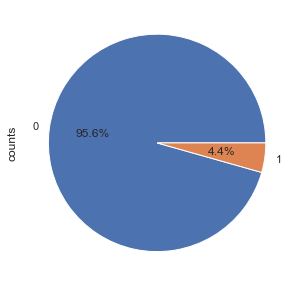

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Graficar el DataFrame en un gráfico de quesito con porcentajes
grouped_df.plot.pie(y='counts',autopct='%.1f%%',legend=False)

# Mostrar el gráfico
plt.show()


Ha fet una divisió basant-se sobretot en número de comentaris, de loves i de shares. En el tipus d'arxiu podem veure que en el cluster 1 la gran majoria dels arxius són vídeos. A partir d'això podem extreure que s'han dividit les publicacions segons si són més o menys popular. Fent el recompte de publicacions adjudicades a un i altre cluster, podem veure que el cluster 1, el qual implica una mitjana molt superior de popularitat implica menys del 5% de les publicacions.